# Support Vector Machine

In [55]:
# Support Vector Machine using libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
datos = pd.read_csv("league_of_lol.csv")

df = pd.DataFrame(datos["blueWins"])

# Pasamos la columna blueWins al final del dataset
datos = datos[[col for col in datos.columns if col != 'blueWins'] + ['blueWins']]

datos = datos.drop(['gameId'], axis = 1)

X = datos.iloc[:, :-1].values
y = datos.iloc[:, -1].values


In [57]:
#Dividir el conjunto de datos en entrenamiento y prueba
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [58]:
# Escalar variables
from sklearn.preprocessing import MinMaxScaler
escalador = MinMaxScaler()
X_entreno[:, :-1] = escalador.fit_transform(X_entreno[:, :-1])
X_prueba[:, :-1] = escalador.fit_transform(X_prueba[:, :-1])

In [59]:
datos = datos.drop(['blueTotalGold', "blueTotalExperience", "blueGoldDiff",
                    "blueExperienceDiff","blueCSPerMin",
                    "blueGoldPerMin", "redTotalGold", "redTotalExperience", 
                    "redGoldDiff","redExperienceDiff", "redCSPerMin", "redGoldPerMin"], axis = 1)

In [60]:
model = SVC(kernel='linear')
model.fit(X_entreno, y_entreno)

SVC(kernel='linear')

In [61]:
y_pred = model.predict(X_prueba)
print("accuracy_score: ", accuracy_score(y_prueba, y_pred))
print("classification_report: \n", classification_report(y_prueba, y_pred))

accuracy_score:  0.7378542510121457
classification_report: 
               precision    recall  f1-score   support

           0       0.71      0.80      0.76      1002
           1       0.77      0.67      0.72       974

    accuracy                           0.74      1976
   macro avg       0.74      0.74      0.74      1976
weighted avg       0.74      0.74      0.74      1976



In [62]:
# print the name of the columns for X_prueba
print("X_prueba columns: ", datos.columns[:-1])

# blueKills, blueWardsDestroyed

X_prueba columns:  Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
       'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons',
       'blueHeralds', 'blueTowersDestroyed', 'blueAvgLevel',
       'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
       'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills',
       'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons',
       'redHeralds', 'redTowersDestroyed', 'redAvgLevel',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')


C:\Users\aleaz\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aleaz\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aleaz\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aleaz\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

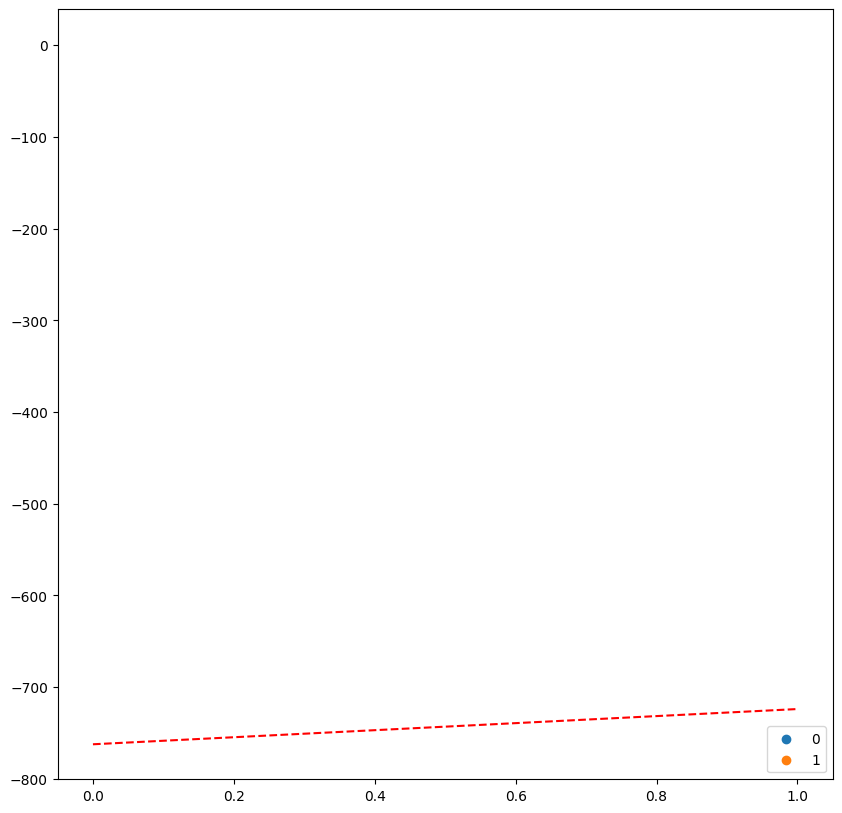

In [67]:
# plotting two variables (columns)

plt.figure(figsize=(10, 10))
# for scatterplot, x will be blueKills and y will be blueWardsDestroyed
sns.scatterplot(
    x = X_prueba[:, 3],
    y = X_prueba[:, 1],
    hue=y_pred,
    s = 0
)

# construyamos el hiperplano. 
w = model.coef_[0]
b = model.intercept_[0]
xpoints = np.linspace(0, 1, 100)
ypoints = -(w[0]/w[1])*xpoints - b/w[1]

plt.plot(xpoints, ypoints, linestyle='--', c = 'r')